<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/6.%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6. 합성곱 신경망(Convolutional Neural Network)

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/6.%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D(Convolutional%20Neural%20Network).ipynb 

이번 챕터에서는 주로 이미지, 비전 분야에서 사용되는 (하지만 자연어 처리에서도 일부 사용되는) 합성곱 신경망(Convolutional Neural Network)에 대해 배운다.

네모 형식으로 처리할 수 있으면 적용할 수 있다.

##6.1 합성곱과 풀링(Convolution and Pooling)

합성곱 신경망은 합성곱층(Convolution layer)과 풀링층(Pooling layer)으로 구성된다. 아래의 그림은 합성곱 신경망의 일반적인 예를 보여준다.

![대체 텍스트](https://wikidocs.net/images/page/62306/convpooling.PNG)

위의 그림에서 CONV는 합성곱 연산을 의미한다.

RELU는 활성화 함수로 합성곱 연산의 결과가 활성화 함수 ReLU를 지난다.

이 두 과정을 합성곱층이라고 한다.

그 후에 POOL이라는 구간을 지난다. 이는 풀링 연산을 의미하여 풀링층이라고 한다.

###6.1.1 합성곱 신경망의 대두

합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망이다.

이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수 있지만 한계가 있었다.

아래의 그림은 알파벳 Y에 대한 손글씨 두 개를 2차원 텐서인 행렬로 표현한 것이다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv0.png)

사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하다.

기계가 보기에는 각 픽셀마다 가진 값이 상이하므로 완전히 다른 값으로 인식한다.

이미지는 위와 같이 같은 대상이라도 휘어지거나, 이동되거나, 방향이 뒤틀리는 등 다양한 변형이 존재한다.

다층 퍼셉트론은 몇 가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점이 있다.

위 손글씨를 다층 퍼셉트론으로 분류한다고 하면, 이미지를 1차원 텐서인 벡터로 변환하고 다층 퍼셉트론의 입력으로 사용한다.

두 번째 손글씨를 다층 퍼셉트론으로 분류하기 위해 벡터로 바꾸면 다음과 같다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv1.png)

1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵다.

이는 기계도 마찬가지로 위와 같은 결과는 변환 전에 가지고 있던 공간적인 구조(spatial structure) 정보가 유실된 상태이다.

여기서 공간적인 구조 정보라는 것은 거리가 가까운 어떤 픽셀들끼리는 연관이 있다거나, 어떤 픽셀들끼리는 값이 비슷하다거나 등의 정보를 말한다.

결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 사용하는 것이 합성곱 신경망이다.

###6.1.2 채널(Channel)

이미지는 (높이, 너비, 채널)이라는 3차원 텐서이다. 

높이는 이미지의 세로 방향 픽셀 수

너비는 이미지의 가로 방향 픽셀 수

채널은 색 성분으로 흑백이면 채널 수 1, RGB면 채널 수 3이다.

각 픽셀은 0부터 255 사이의 값을 가진다.

아래는 28 X 28 픽셀의 손글씨 데이터이다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv2.png)

위 손글씨 데이터는 흑백 이미지므로 채널 수가 1임을 고려하면 (28 X 28 X 1)의 크기를 가지는 3차원 텐서다.

컬러 이미지 였으면 채널 수가 3으로 (28 X 28 X 3) 이었을 것이다. 

![대체 텍스트](https://wikidocs.net/images/page/64066/conv3.png)

컬러 이미지는 적색(Red), 녹색(green), 청색(Blue) 채널로 수가 3개이다.

채널은 때로는 깊이(depth)라고도 한다.

이 경우 이미지는 (높이, 너비, 깊이)라는 3차원 텐서로 표현된다고 말할 수 있다.

채널에 대한 정의를 확실히 해야한다.

[[[1], [0], [1]],
 
   [0], [0], [1]]]

이러면 흑백

[[[0, 1, 0], [1, 0, 0], [1, 1, 0],

   [1, 1, 0], [0, 0, 0], [1, 0, 0]]]

이러면 RGB

###6.1.3 합성곱 연산(Convolution operation)

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 한다.

합성곱은 영어로 컨볼루션이라고도 불린다.

합성곱은 커널(kernel) 또는 필터(filter)라고도 불린다.

합성곱은 $n$  X  $m$ 크기의 행렬로 높이(height)X너비(width) 크기의 이미지를 처음부터 끝까지 겹치며 훑는다.

합성곱은 $n$ X $m$ 크기의 겹쳐지는 부분의 각 이미지와 합성곱(커널, 필터)의 원소의 값을 각각 곱해서 모두 더한다. 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽 까지 순차적으로 훑는다.

합성곱(커널, 필터)은 일반적으로 3 X 3 또는 5 X 5를 사용한다.

아래는 5 X 5의 이미지 행렬에 3 X 3 크기의 커널로 합성곱 연상을 수행하는 과정이다.

한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 이미지와 식으로 표현해봤다.

1) 첫번째 스텝

![대체 텍스트](https://wikidocs.net/images/page/64066/conv4.png)

(1×1) + (2×0) + (3×1) + (2×1) + (1×0) + (0×1) + (3×0) + (0×1) + (1×0) = 6

2) 두번째 스텝

![대체 텍스트](https://wikidocs.net/images/page/64066/conv5.png)

(2×1) + (3×0) + (4×1) + (1×1) + (0×0) + (1×1) + (0×0) + (1×1) + (1×0) = 9

3) 세번째 스텝

![대체 텍스트](https://wikidocs.net/images/page/64066/conv6.png)

(3×1) + (4×0) + (5×1) + (0×1) + (1×0) + (2×1) + (1×0) + (1×1) + (0×0) = 11

4) 네번째 스텝

![대체 텍스트](https://wikidocs.net/images/page/64066/conv7.png)

(2×1) + (1×0) + (0×1) + (3×1) + (0×0) + (1×1) + (1×0) + (4×1) + (1×0) = 10


위 연산을 총 9번의 스텝까지 마쳤다고 가정하였을 때, 최종 결과는 아래와 같다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv8.png)

위와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 특성 맵(feature map)이라고 한다.

위의 예제에서는 커널의 크기가 3 × 3이었지만, 커널의 크기는 사용자가 정할 수 있다. 

또한 커널의 이동 범위가 위의 예제에서는 한 칸이었지만, 이 또한 사용자가 정할 수 있다. 이러한 이동 범위를 스트라이드(stride)라고 합니다.

아래의 예제는 스트라이드가 2일 경우에 5 × 5 이미지에 합성곱 연산을 수행하는 3 × 3 커널의 움직임을 보여준다. 최종적으로 2 × 2의 크기의 특성 맵을 얻는다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv9.png)

이미지에서 인식하려는 부분이 언제나 중아에 있지는 않는다.

가장자리에 있을 수도 있으니 잘 인식하려면 패딩을 입혀준다.

###6.1.4 패딩(Padding)

위의 예에서 5 X 5 이미지에 3 X 3의 커널로 합성곱 연산을 하였을 때, 스트라이드가 1일 경우에는 3 X 3의 특성 맵을 얻었다.

이와 같이 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징이 있다.

만약, 합성곱 층을 여러 개 쌓으면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 될 것이다.

합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기과 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용하면 된다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv10.png)

패딩은 (합성곱 연산을 하기 전에) 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말한다.

좀 더 쉽게 설명하면 지정된 개수의 폭만큼 테두리를 추가한다.

주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용한다.

위의 그림은 5 X 5 이미지에 1폭짜리 제로 패딩을 사용하여 위, 아래에 하나의 행을 좌, 우에 하나의 열을 추가한 모습을 보여준다.

커널은 주로 3 X 3 또는 5 X 5를 사용하는데, 만약 스트라이드가 1이라고 하였을 때, 3 X 3크기의 커널을 사용한다면 1폭짜리 제로 패딩을 사용하고, 5 X 5크기의 커널을 사용한다면 2폭짜리 제로 패딩을 사용하면 입렵과 특성 맵의 크기를 보존할 수 있다.

왜냐하면, 5 X 5 크기의 이미지에 1폭짜리 제로 패딩을 하면 7 X 7 이미지가 되는데, 여기에 3 X 3의 커널을 사용하여 1 스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 5 X 5가 되기 때문이다.

다시 생각해보자. 7 X 7 크기의 이미지에 2폭짜리 제로 패딩을 하면 11 X 11 이미지가 되는데, 여기에 5 X 5의 커널을 사용하여 1 스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 7 X 7가 된다.

###6.1.5 가중치와 편향

1) 합성곱 신경망의 가중치

다층 퍼셉트론으로 3 × 3 이미지를 처리한다고 가정해보자.

우선 이미지를 1차원 텐서인 벡터로 만들면, 3 × 3 = 9가 되므로 입력층은 9개의 뉴런을 가진다. 

그리고 4개의 뉴런을 가지는 은닉층을 추가한다고 해보면 이는 아래의 그림과 같다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv11.png)

위에서 각 연결선은 가중치를 의미하므로, 위의 그림에서는 9 × 4 = 36개의 가중치를 갖는다. 

이제 비교를 위해 합성곱 신경망으로 3 × 3 이미지를 처리한다고 해보자. 

2 × 2 커널을 사용하고, 스트라이드는 1로 한다. (*는 합성곱 연산을 의미한다.)

![대체 텍스트](https://wikidocs.net/images/page/64066/conv12.png)

사실 합성곱 신경망에서 가중치는 커널 행렬의 원소들이다. 

이를 인공 신경망의 형태로 표현한다면 다음과 같이 표현할 수 있다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv13.png)

최종적으로 특성 맵을 얻기 위해서는 동일한 커널로 이미지 전체를 훑으며 합성곱 연산을 진행한다.

결국 이미지 전체를 훑으면서 사용되는 가중치는 $w_0, w_1, w_2, w_3$ 4개 뿐이다.

그리고 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것을 볼 수 있다. 

결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 적은 수의 가중치를 사용하며 공간적 구조 정보를 보존한다는 특징이 있다.

다층 퍼셉트론의 은닉층에서는 가중치 연산 후에 비선형성을 추가하기 위해서 활성화 함수를 통과시켰다. 

합성곱 신경망의 은닉층에서도 마찬가지다. 

합성곱 연산을 통해 얻은 특성 맵은 다층 퍼셉트론때와 마찬가지로 비선형성 추가를 위해서 활성화 함수를 지나게 된다. 

이때 렐루 함수나 렐루 함수의 변형들이 주로 사용된다. 

은닉층에서 렐루 함수가 주로 사용되는 이유는 앞서 활성화 함수 챕터에서 다뤘다.

이와 같이 합성곱 연산을 통해서 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 합성곱 신경망에서는 합성곱 층(convolution layer)이라고 한다.


2) 합성곱 신경망의 편향

![대체 텍스트](https://wikidocs.net/images/page/64066/conv14.png)

합성곱 신경망에도 편향(bias)를 당연히 추가할 수 있다. 

만약, 편향을 사용한다면 커널을 적용한 뒤에 더해잔다. 

편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해진다.

###6.1.6 특성 맵의 크기 계산 방법

입력의 크기

커널의 크기

스트라이드의 값만 알면 

합성곱 연산의 결과인 특성 맵의 크기를 계산할 수 있다.



*   $I_{h}$ : 입력의 높이

*   $I_{w}$ : 입력의 너비

*   $K_{h}$ : 커널의 높이

*   $K_{w}$ : 커널의 높이

*   $S$ : 스트라이드

*   $O_{h}$ : 특성 맵의 높이

*   $O_{w}$ : 특성 맵의 너비

이에 따라 특성 맵의 높이와 너비는 다음과 같다.

$O_{h} = floor(\frac{I_{h} - K_{h}}{S}+1)$

$O_{w} = floor(\frac{I_{w} - K_{w}}{S}+1)$

여기서 $floor$ 함수는 소수점 발생 시 소수점 이하를 버리는 역할을 한다. 

예를 들어 위의 첫번째 예제의 경우 5 × 5 크기의 이미지에 3 × 3 커널을 사용하고 스트라이드 1로 합성곱 연산을 했다.

이 경우 특성 맵의 크기는 (5 - 3 + 1 ) × (5 - 3 + 1) = 3 × 3임을 알 수 있다. 이는 또한 총 9번의 스텝이 필요함을 의미하기도 한다.

패딩의 폭을 P라고 하고, 패딩까지 고려한 식은 다음과 같다.

$O_{h} = floor(\frac{I_{h} - K_{h} + 2P}{S}+1)$

$O_{w} = floor(\frac{I_{w} - K_{w} + 2P}{S}+1)$

[[[1,1,1], [1,1,1], [1,1,1]],

 [[1,1,1], [1,1,1], [1,1,1]],

 [[1,1,1], [1,1,1], [1,1,1]]]

3 X 3 이미지가 있다.

패딩 하나를 해주면

[[[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]],

 [[0,0,0], [1,1,1], [1,1,1], [1,1,1], [0,0,0]],

 [[0,0,0], [1,1,1], [1,1,1], [1,1,1], [0,0,0]],

 [[0,0,0], [1,1,1], [1,1,1], [1,1,1], [0,0,0]],

 [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]]]

conv layer의 커널의 fliter 수는 input matrix의 filter의 수라고 할 수 있다.

###6.1.7 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

지금까지는 채널(channel) 또는 깊이(depth)를 고려하지 않고, 2차원 텐서를 가정하고 설명했다. 

하지만 실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 특성 맵일 수 있다. 

만약, 다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다고 하면 커널의 채널 수도 입력의 채널 수만큼 존재해야 한다. 

다시 말해 입력 데이터의 채널 수와 커널의 채널 수는 같아야 한다. 

채널 수가 같으므로 합성곱 연산을 채널마다 수행한다. 

그리고 그 결과를 모두 더하여 최종 특성 맵을 얻는다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv15.png)

위 그림은 3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산을 보여준다. 

커널의 각 채널끼리의 크기는 같아야 한다. 

각 채널 간 합성곱 연산을 마치고, 그 결과를 모두 더해서 하나의 채널을 가지는 특성 맵을 만든다. 

주의할 점은 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널이라는 점이다.

위 그림은 높이 3, 너비 3, 채널 3의 입력이 높이 2, 너비 2, 채널 3의 커널과 합성곱 연산을 하여 높이 2, 너비 2, 채널 1의 특성 맵을 얻는다는 의미다. 

합성곱 연산의 결과로 얻은 특성 맵의 채널 차원은 RGB 채널 등과 같은 컬러의 의미를 담고 있지는 않는다.

이제 이 연산에서 각 차원을 변수로 두고 좀 더 일반화 시켜보겠다.

###6.1.8 3차원 텐서의 합성곱 연산

*   $I_{h}$ : 입력의 높이

*   $I_{w}$ : 입력의 너비

*   $K_{h}$ : 커널의 높이

*   $K_{w}$ : 커널의 너비

*   $O_{h}$ : 특성 맵의 높이

*   $O_{w}$ : 특성 맵의 너비

*   $C_{i}$ : 입력 데이터의 채널

다음은 3차원 텐서의 합성곱 연산을 보여준다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv16_final.png)

높이 $I_h$, 너비 $I_w$, 채널 $C_i$의 입력 데이터는 동일한 채널 수 $C_i$를 가지는 높이 $K_h$, 너비 $K_w$의 커널과 합성곱 연산을 하여 높이 $O_h$, 너비 $O_w$, 채널 1의 특성 맵을 얻는다. 

그런데 하나의 입력에 여러 개의 커널을 사용하는 합성곱 연산을 할 수도 있다.

합성곱 연산에서 다수의 커널을 사용할 경우, 특성 맵의 크기가 어떻게 바뀌는지 보자. 

다음은 $C_o$를 합성곱 연산에 사용하는 커널의 수라고 하였을 때의 합성곱 연산 과정을 보여준다.

![대체 텍스트](https://wikidocs.net/images/page/64066/conv17_final_final.PNG)

합성곱 연산에서 다수의 커널을 사용할 경우, 사용한 커널 수는 합성곱 연산의 결과로 나오는 특성 맵의 채널 수가 된다.

이를 이해했다면 커널의 크기와 입력 데이터의 채널 수 $C_i$와 특성 맵(출력 데이터)의 채널 수 $C_o$가 주어졌을 때, 가중치 매개변수의 총 개수를 구할 수 있다.

가중치는 커널의 원소들이므로 하나의 커널의 하나의 채널은 $K_h$ × $K_w$개의 매개변수를 가지고 있다. 

그런데 합성곱 연산을 하려면 커널은 입력 데이터의 채널 수와 동일한 채널 수를 가져야 한다. 

이에 따라 하나의 커널이 가지는 매개변수의 수는 $K_h$ × $K_w$ × $C_i$다. 

그런데 이러한 커널이 총 $C_o$개가 있어야 하므로 가중치 매개변수의 총 수는 다음과 같다.

가중치 매개변수의 총 수 : $K_h$ × $K_w$ × $C_i$ × $C_o$

가중치 매개변수의 총 수 : 커널의 높이 × 커널의 너비 × 입력 데이터의 채널 × 합성곱 연산에 사용하는 커널의 수 

###6.1.9 풀링(Pooling)

일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적이다. 

풀링 층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어진다. 

풀링 연산에는 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용된다. 

우선 최대 풀링을 통해서 풀링 연산을 이해해보자.

![대체 텍스트](https://wikidocs.net/images/page/62306/maxpooling.PNG)

풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념을 가진다.

위의 그림은 스트라이드가 2일 때, 2 x 2 크기 커널로 맥스 풀링 연산을 했을 때 특성맵이 절반의 크기로 다운샘플링되는 것을 보여준다. 

맥스 풀링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운샘플링한다.

다른 풀링 기법인 평균 풀링은 최대값을 추출하는 것이 아니라 평균값을 추출하는 연산이 된다. 

풀링 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 합성곱 연산과의 차이점은 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점이다.

풀링을 사용하면, 특성 맵의 크기가 줄어드므로 특성 맵의 가중치의 개수를 줄여준다.

##6.2 CNN으로 MNIST 분류하기

###6.2.1 모델 이해하기

1) 첫번째 표기 방법

합성곱(nn.Cov2d) + 활성화 함수(nn.ReLU)를 하나의 합성곱 층으로 보고, 맥스풀링(nn.MaxPoold2d)은 풀링 층으로 별도로 명명한다.

2) 두번째 표기 방법

합성곱(nn.Cov2d) + 활성화 함수(nn.ReLU) + 맥스풀링(nn.MaxPoold2d)을 하나의 합성곱 층으로 본다.

우리는 맥스풀링까지도 포함해서 하나의 합성곱 층으로 판단하는 두번째 표기 방법을 사용하겠다.

모델의 아키텍처는 총 3개의 층으로 구성된다.

```
# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

이를 직접 구현해보며 이해해보자.

###6.2.2 모델 구현하기

In [0]:
import torch
import torch.nn as nn

In [2]:
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)
print(f'텐서의 크기 : {inputs.shape}')

텐서의 크기 : torch.Size([1, 1, 28, 28])


In [3]:
conv1 = nn.Conv2d(1, 32, 3, padding=1) # 1채널 짜리를 입력받아서 32채널을 뽑아낸다. 커널 사이즈는 3이고 패딩은 1이다.
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [4]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 32채널 짜리를 입력받아서 64채널을 뽑아낸다. 커널 사이즈는 3이고 패딩은 1이다.
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [5]:
pool = nn.MaxPool2d(2) # 정수 하나를 인자로 넣으면 커널 사이즈와 스트라이드가 둘 다 해당값으로 지정된다.
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [6]:
out = conv1(inputs) # 입력을 첫번째 합성곱 층으로 통과시킨 후의 텐서의 크기
print(out.shape)

torch.Size([1, 32, 28, 28])


1 채널이 32채널이 되었다.

너비 28, 높이 28의 행렬이 보존되었다.

이유는 3 X 3 커널을 사용하는데 패딩을 1폭으로 했기 때문이다.

In [7]:
out = pool(out) # 맥스풀링을 통과시킨 후 텐서의 크기
print(out.shape)

torch.Size([1, 32, 14, 14])


2 X 2 짜리 커널로 스트라이드 2씩 맥스풀링 했기 때문에 28 X 28행렬이 14 X 14가 되었다.

In [8]:
out = conv2(out) # 두번째 합성곱 층으로 통과시킨 후의 텐서의 크기
print(out.shape)

torch.Size([1, 64, 14, 14])


32 채널이 64채널이 되었다.

너비 14, 높이 14의 행렬이 보존되었다.

이유는 3 X 3 커널을 사용하는데 패딩을 1폭으로 했기 때문이다.

In [9]:
out = pool(out) # 맥스풀링을 통과시킨 후 텐서의 크기
print(out.shape) 

torch.Size([1, 64, 7, 7])


이제 이 텐서를 펼칠건데 그 전에 .size(n)에 대해 살펴보자.

In [10]:
print(out.size(0))
print(out.size(1))
print(out.size(2))
print(out.size(3))

1
64
7
7


In [11]:
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


배치 차원을 제외하고 모두 하나의 차원으로 통합된 것을 볼 수 있다.

이제 이 텐서를 전결합층(Fully-connected layer)에 통과시켜보자.

출력층으로 10개의 뉴런을 배치하여 10개의 차원의 텐서로 변환한다.

In [12]:
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

torch.Size([1, 10])


###6.2.3 CNN으로 MNIST 분류하기

In [0]:
import torch
import torch.nn as nn

import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [16]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [0]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # 첫번째층
    # ImgIn shape=(?, 28, 28, 1)
    #    Conv     -> (?, 28, 28, 32)
    #    Pool     -> (?, 14, 14, 32)
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))

    # 두번째층
    # ImgIn shape=(?, 14, 14, 32)
    #    Conv      ->(?, 14, 14, 64)
    #    Pool      ->(?, 7, 7, 64)
    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))

    # 전결합층 7x7x64 inputs -> 10 outputs
    self.fc = nn.Linear(7 * 7 * 64, 10, bias=True)

    # 전결합층 한정으로 가중치 초기화
    nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
    out = self.fc(out)
    return out

In [0]:
# CNN 모델 정의
model = CNN().to(device)

In [28]:
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].size())

Model's state_dict:
layer1.0.weight 
 torch.Size([32, 1, 3, 3])
layer1.0.bias 
 torch.Size([32])
layer2.0.weight 
 torch.Size([64, 32, 3, 3])
layer2.0.bias 
 torch.Size([64])
fc.weight 
 torch.Size([10, 3136])
fc.bias 
 torch.Size([10])


가중치 매개변수의 총 수 : $K_h$ × $K_w$ × $C_i$ × $C_o$

가중치 매개변수의 총 수 : 커널의 높이 × 커널의 너비 × 입력 데이터의 채널 × 합성곱 연산에 사용하는 커널의 수 

In [29]:
# 이 모델에서 파라미터는 총 몇개일까?
(3*3*1*32)+32+(3*3*32*64)+64+(7*7*64*10)+10 #(가중치)+편향, 편향은 행렬 형식으로 있다.

50186

In [0]:
criterion = nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
total_batch = len(data_loader)
print(f'총 배치의 수 : {total_batch}')

총 배치의 수 : 600


총 배치의 수는 600

배치의 크기를 100으로 했으니

훈련 데이터는 총 60,000개

In [34]:
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
    # image is already size of (28x28), no reshape
    # label is not one-hot encoded
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print(f'[Epoch: {epoch+1}] cost = {avg_cost}')

[Epoch: 1] cost = 0.22224251925945282
[Epoch: 2] cost = 0.06365162134170532
[Epoch: 3] cost = 0.04564014449715614
[Epoch: 4] cost = 0.03715888038277626
[Epoch: 5] cost = 0.031834352761507034
[Epoch: 6] cost = 0.024941839277744293
[Epoch: 7] cost = 0.02145300805568695
[Epoch: 8] cost = 0.018802035599946976
[Epoch: 9] cost = 0.016268661245703697
[Epoch: 10] cost = 0.012760436162352562
[Epoch: 11] cost = 0.012301141396164894
[Epoch: 12] cost = 0.00979432463645935
[Epoch: 13] cost = 0.008749576285481453
[Epoch: 14] cost = 0.0066065373830497265
[Epoch: 15] cost = 0.006964636035263538


In [35]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
  X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9735999703407288


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


##6.3 깊은 CNN으로 MNIST 분류하기

###6.3.1 모델 이해하기

모델의 아키텍처는 총 5개의 층으로 구성된다.

앞서 배운 챕터에서 1번 레이어와 2번 레이어는 동일하되, 새로운 합성곱층과 전결합층을 추가했다.

```
# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 64, out_channel = 128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2, padding=1))

# 4번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 4 × 4 × 128 → batch_size × 2048
전결합층(뉴런 625개) + 활성화 함수 ReLU

# 5번 레이어 : 전결합층(Fully-Connected layer)
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

###6.3.2 깊은 CNN으로 MNIST 분류하기

In [0]:
import torch
import torch.nn as nn

import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [0]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [0]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [0]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [0]:
# CNN 모델 정의
model = CNN().to(device)

In [0]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [46]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.190955356
[Epoch:    2] cost = 0.0526669659
[Epoch:    3] cost = 0.0372218974
[Epoch:    4] cost = 0.0300488677
[Epoch:    5] cost = 0.0235267729
[Epoch:    6] cost = 0.0204993337
[Epoch:    7] cost = 0.0167588759
[Epoch:    8] cost = 0.0155386524
[Epoch:    9] cost = 0.0125369765
[Epoch:   10] cost = 0.0116552906
[Epoch:   11] cost = 0.0100756334
[Epoch:   12] cost = 0.00897597242
[Epoch:   13] cost = 0.00710952608
[Epoch:   14] cost = 0.00875000469
[Epoch:   15] cost = 0.0069702589


In [47]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9717999696731567


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


깊다고 다 좋은건 아닌 것 같다.

##6.4 활용

###6.4.1 데이터 불러오기

cifar10 데이터를 바탕으로 CNN 모델 학습

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/6_1_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_with_My_data.ipynb

In [0]:
import matplotlib.pyplot as plt

import torch

import torchvision
import torchvision.datasets 
import torchvision.transforms as transforms

In [49]:
cifar10_data = torchvision.datasets.CIFAR10('data/', download=True)

Extracting data/cifar-10-python.tar.gz to data/


In [50]:
cifar10_data.data[0].shape

(32, 32, 3)

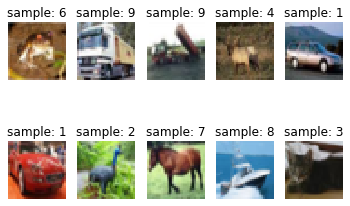

In [51]:
images_and_labels = list(zip(cifar10_data.data, cifar10_data.targets))
for index, (image, label) in enumerate(images_and_labels[:10]): # 10개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [52]:
for i in range(10):
  print(i,'번 인덱스 샘플의 레이블 : ',cifar10_data.targets[i])

0 번 인덱스 샘플의 레이블 :  6
1 번 인덱스 샘플의 레이블 :  9
2 번 인덱스 샘플의 레이블 :  9
3 번 인덱스 샘플의 레이블 :  4
4 번 인덱스 샘플의 레이블 :  1
5 번 인덱스 샘플의 레이블 :  1
6 번 인덱스 샘플의 레이블 :  2
7 번 인덱스 샘플의 레이블 :  7
8 번 인덱스 샘플의 레이블 :  8
9 번 인덱스 샘플의 레이블 :  3


In [53]:
cifar10_train = torchvision.datasets.CIFAR10(root='cifar10_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.Compose([transforms.Resize(256),
                                                             transforms.ColorJitter(),
                                                             transforms.RandomCrop(224),
                                                             transforms.RandomHorizontalFlip(),
                                                             transforms.Resize(32),
                                                             transforms.ToTensor(),
                                                             transforms.Normalize([0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261])
                               ]),
                          download=True)

cifar10_test = torchvision.datasets.CIFAR10(root='cifar10_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.Compose([transforms.Resize(256),
                                                             transforms.ColorJitter(),
                                                             transforms.RandomCrop(224),
                                                             transforms.RandomHorizontalFlip(),
                                                             transforms.Resize(32),
                                                             transforms.ToTensor(),
                                                             transforms.Normalize([0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261])
                               ]),
                         download=True)

Extracting cifar10_data/cifar-10-python.tar.gz to cifar10_data/
Files already downloaded and verified


In [54]:
cifar10_train[0][0].size()

torch.Size([3, 32, 32])

In [55]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

learning_rate = 0.001
epochs = 10
batch_size = 64

cuda


In [0]:
train_loader = torch.utils.data.DataLoader(dataset=cifar10_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=cifar10_test,
                                          batch_size=len(cifar10_test))

###6.4.2 모델 1

In [0]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(8 * 8 * 64, 100, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x) # [batch_size, 3, 32, 32] -> [batch_size, 32, 32, 32] -> [batch_size, 32, 16, 16]
        out = self.layer2(out) # [batch_size, 32, 16, 16] -> [batch_size, 64, 16, 16] -> [batch_size, 64, 8, 8]
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [0]:
model = CNN().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [59]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 781


In [60]:
plot_list = {'train':[],'val':[],'accuracy':[]}

for epoch in range(epochs):
    model.train()
    train_losses = []
    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        train_loss = criterion(hypothesis, Y)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.detach())
    with torch.no_grad():
        model.eval()
        val_losses = []
        for i,data in enumerate(test_loader):
            inputs,targets = data[0].to(device), data[1].to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs,targets)
            val_losses.append(val_loss.detach())

            prob,label = torch.exp(outputs).topk(1,dim=1)

        correct = label.view(-1)==targets
        val_accuracy = correct.float().mean()

    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 1.45745050907135
1 epoch val loss = 1.207731008529663
1 epoch accuracy = 0.5777999758720398
--------------------------------------------------
2 epoch train loss = 1.1388815641403198
2 epoch val loss = 1.0927785634994507
2 epoch accuracy = 0.6209999918937683
--------------------------------------------------
3 epoch train loss = 1.0314171314239502
3 epoch val loss = 0.9909048676490784
3 epoch accuracy = 0.6548999547958374
--------------------------------------------------
4 epoch train loss = 0.9726815223693848
4 epoch val loss = 0.9772276282310486
4 epoch accuracy = 0.6599000096321106
--------------------------------------------------
5 epoch train loss = 0.9303674101829529
5 epoch val loss = 0.92942214012146
5 epoch accuracy = 0.679099977016449
--------------------------------------------------
6 epoch train loss = 0.89520663022995
6 epoch val loss = 0.9196981191635132
6 epoch accuracy = 0.6818999648094177
--------------------------------------------------
7 epoc

###6.4.2 모델 2 (More Deeper)

In [0]:
class My_CNN(torch.nn.Module):

    def __init__(self):
        super(My_CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),)

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(8 * 8 * 64, 100, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x) # [batch_size, 3, 32, 32] -> [batch_size, 32, 32, 32] -> [batch_size, 32, 16, 16]
        out = self.layer2(out) # [batch_size, 32, 16, 16] -> [batch_size, 64, 16, 16] -> [batch_size, 64, 8, 8]
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [0]:
model = My_CNN().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [63]:
plot_list = {'train':[],'val':[],'accuracy':[]}

for epoch in range(epochs):
    model.train()
    train_losses = []
    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        train_loss = criterion(hypothesis, Y)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.detach())
        
    
    with torch.no_grad():
        model.eval()
        val_losses = []
        for i,data in enumerate(test_loader):
            inputs,targets = data[0].to(device), data[1].to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs,targets)
            val_losses.append(val_loss.detach())

            prob,label = torch.exp(outputs).topk(1,dim=1)

        correct = label.view(-1)==targets
        val_accuracy = correct.float().mean()


    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 1.6144968271255493
1 epoch val loss = 1.3046554327011108
1 epoch accuracy = 0.5411999821662903
--------------------------------------------------
2 epoch train loss = 1.2158347368240356
2 epoch val loss = 1.0932791233062744
2 epoch accuracy = 0.6154999732971191
--------------------------------------------------
3 epoch train loss = 1.0502241849899292
3 epoch val loss = 0.9866474866867065
3 epoch accuracy = 0.6586999893188477
--------------------------------------------------
4 epoch train loss = 0.9553911089897156
4 epoch val loss = 0.9291877746582031
4 epoch accuracy = 0.6796000003814697
--------------------------------------------------
5 epoch train loss = 0.8892860412597656
5 epoch val loss = 0.9199531078338623
5 epoch accuracy = 0.6780999898910522
--------------------------------------------------
6 epoch train loss = 0.8352537751197815
6 epoch val loss = 0.8774507641792297
6 epoch accuracy = 0.6969000101089478
-------------------------------------------------

### 모델 3 (Resnet Fine Tuning)

In [64]:
from torchvision import models
import torch.nn as nn
resnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [65]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
resnet.fc.out_features = 10

In [67]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
model = resnet.to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [69]:
plot_list = {'train':[],'val':[],'accuracy':[]}

for epoch in range(epochs):
    model.train()
    train_losses = []
    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        train_loss = criterion(hypothesis, Y)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.detach())
    
    model.eval()
    val_losses = []
    for i,data in enumerate(test_loader):
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model(inputs)
        val_loss = criterion(outputs,targets)
        val_losses.append(val_loss.detach())

        prob,label = torch.exp(outputs).topk(1,dim=1)

    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()

    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 1.0992671251296997
1 epoch val loss = 0.7934638857841492
1 epoch accuracy = 0.7211999893188477
--------------------------------------------------
2 epoch train loss = 0.7454693913459778
2 epoch val loss = 0.7219944000244141
2 epoch accuracy = 0.7577999830245972
--------------------------------------------------
3 epoch train loss = 0.6565535664558411
3 epoch val loss = 0.6550021767616272
3 epoch accuracy = 0.7754999995231628
--------------------------------------------------
4 epoch train loss = 0.5919867157936096
4 epoch val loss = 0.7017496228218079
4 epoch accuracy = 0.7566999793052673
--------------------------------------------------
5 epoch train loss = 0.5444292426109314
5 epoch val loss = 0.5733613967895508
5 epoch accuracy = 0.8047999739646912
--------------------------------------------------
6 epoch train loss = 0.5366145372390747
6 epoch val loss = 0.5827420353889465
6 epoch accuracy = 0.8009999990463257
-------------------------------------------------